Now we will be looking at the non linear convection equation. We can produce it by substituting the c of the linear case of step 1 with another function $u$. It follows the equation $$\frac{\partial u}{\partial t} + u\frac{\partial u}{\partial x} = 0.$$

The discretisation in this case will look like this: $$u_i^{n+1}=u_i^n- u_i^n\frac{\Delta t}{\Delta x}\left(u_i^n-u_{i-1}^n\right).$$

In [141]:
import numpy                 # we're importing numpy 
from matplotlib import pyplot    # and our 2D plotting library
%matplotlib inline


nx = 150
nt = 250   #nt is the number of timesteps we want to calculate
dt = .002  #dt is the amount of time each timestep covers (delta t)
dx = 2 / (nx - 1)

print("dt/dx = ", dt/dx)

u = numpy.ones(nx)      #as before, we initialize u with every value equal to 1.
u[int(.5 / dx) : int(1 / dx + 1)] = 2  #then set u = 2 between 0.5 and 1 as per our I.C.s

un = numpy.ones(nx) #initialize our placeholder array un, to hold the time-stepped solution

dt/dx =  0.149


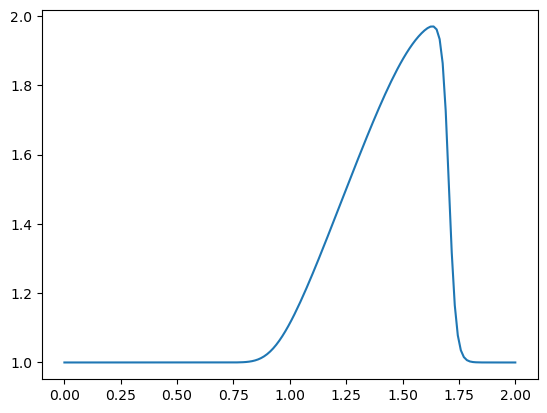

In [142]:
for n in range(nt):  #iterate through time
    un = u.copy() ##copy the existing values of u into un
    for i in range(1, nx):  ##now we'll iterate through the u array
           u[i] = un[i] - un[i] * dt / dx * (un[i] - un[i-1]) 

        
pyplot.plot(numpy.linspace(0, 2, nx), u) ##Plot the results

It seems that the so called inviscid Burgers equation produces instable solutions very reliable with values of $\frac{dt}{dx}>0.5$. The bigger the value is the faster the instabilities get out of hand until they produce discontinuous solutions.

Otherwise the individual values of $dt$ and $dx$ do not seem to have a big contribution in the stability in isolation, only the relative difference of them.

However at the value of $dt/dx=0.5$ we find that the left side of the structure is still just the peak but the right side, washes out. This washing out occurs on the left side of the structure only at values under 0.5.
The smaller the value gets the more the figures caves to the right, where the right side is a vertical line and the left side is retarded more and more, like a saw tooth shape.